In [ ]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.2/217.2 kB 9.5 MB/s eta 0:00:00


In [ ]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29103 sha256=bfd08d868fabae8697434c9e12619dc6a90697eb79406bc94f6f5384fcd4b9ff
  Stored in directory: /root/.cache/pip/wheels/6a/76/03/7f785aaa50b9c6ec7e3fd105a62c1b2c45a034512d51e024a9
Successfully built ta


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as pdr
import datetime as dt
from hmmlearn.hmm import GaussianHMM
import yfinance as yf

In [ ]:
end_date = dt.date.today()
start_date = end_date - dt.timedelta(days = 6300)
ticker='^NSEI'

In [ ]:
data= yf.download(ticker,start_date, end_date)
#data = pdr.get_data_yahoo(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300


In [ ]:
data['Volatility'] = data['Close'].rolling(20).std()

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Volatility
Date,,,,,,,
2007-10-15,5428.350098,5682.649902,5419.899902,5670.399902,5670.399902,0,315.391206
2007-10-16,5670.649902,5708.350098,5578.450195,5668.049805,5668.049805,0,312.410514
2007-10-17,5658.899902,5658.899902,5107.299805,5559.299805,5559.299805,0,295.136269
2007-10-18,5551.100098,5736.799805,5269.649902,5351.000000,5351.000000,0,278.062852
2007-10-19,5360.350098,5390.850098,5101.750000,5215.299805,5215.299805,0,256.155762
...,...,...,...,...,...,...,...
2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700,256.068976
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800,242.818570
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300,255.391750


In [ ]:
X_train = data.loc[:'2019', ['Volatility']].values
X_test = data.loc['2020':, ['Volatility']].values

In [ ]:
hmm_model1 = GaussianHMM(n_components = 2, covariance_type="full", n_iter=1000).fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
for i in range(hmm_model1.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", hmm_model1.means_[i])

0th hidden state
mean =  [198.25521506]
1th hidden state
mean =  [96.56771638]


#### 0 hidden state: Low Volatility, 1 hidden state: High Volatility

In [ ]:
data.loc[:'2019','Regime'] = hmm_model1.predict(X_train)
data.loc['2020':,'Regime'] = hmm_model1.predict(X_test)

In [ ]:
data['SMA'] = data['Close'].rolling(50).mean()
data['Diff_SMA'] = data['Close'].rolling(12).mean() - data['Close'].rolling(24).mean()

In [ ]:
data.dropna(inplace = True)

In [ ]:
Y_train = data.loc[:'2019', ['Diff_SMA']].values
Y_test = data.loc['2020':, ['Diff_SMA']].values

In [ ]:
hmm_model2 = GaussianHMM(n_components = 2, covariance_type="full", n_iter=1000).fit(Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
for i in range(hmm_model2.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", hmm_model2.means_[i])

0th hidden state
mean =  [-84.62762801]
1th hidden state
mean =  [85.00256008]


In [ ]:
data.loc[:'2019','Trend'] = hmm_model2.predict(Y_train)
data.loc['2020':,'Trend'] = hmm_model2.predict(Y_test)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend
Date,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,0.0,5767.558984,109.927063,1.0
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,0.0,5775.780986,97.174988,1.0
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,0.0,5784.013994,83.752075,1.0
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,0.0,5795.600000,65.114583,1.0
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,0.0,5811.467002,46.675028,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700,256.068976,0.0,17522.429023,-78.710449,0.0
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800,242.818570,0.0,17512.539023,-32.954183,0.0
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300,255.391750,0.0,17504.619023,1.595866,0.0


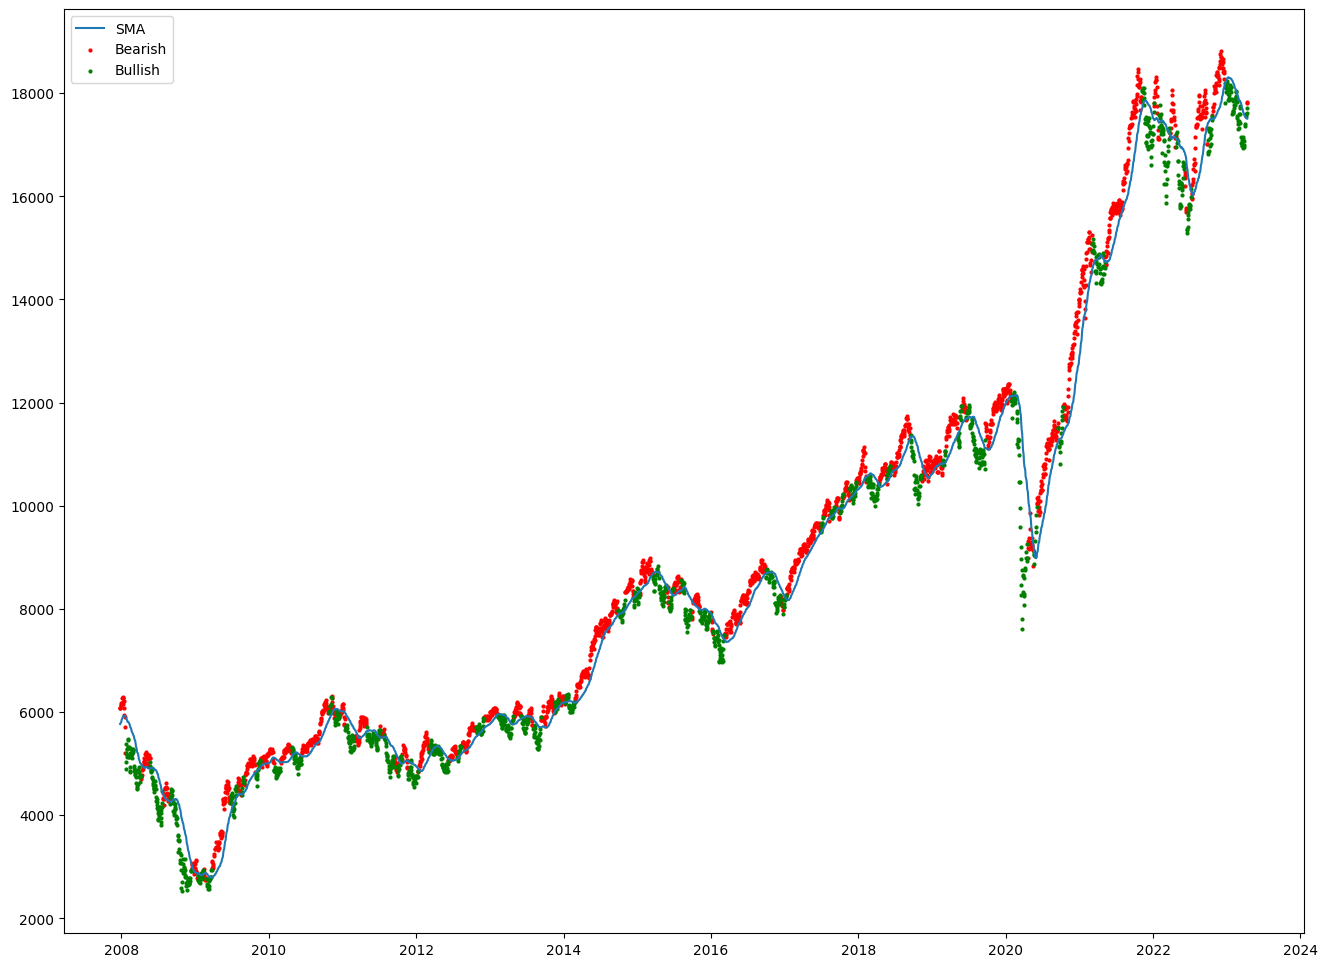

In [ ]:
plt.figure(figsize = (16,12))
plt.plot(data.index, data['SMA'], label = 'SMA')
plt.scatter(data[data['Trend']==1].index, data[data['Trend'] == 1]['Close'], s = 4, label = 'Bearish', c = 'red')
plt.scatter(data[data['Trend']==0].index, data[data['Trend'] == 0]['Close'], s = 4, label = 'Bullish', c = 'green')
plt.legend()

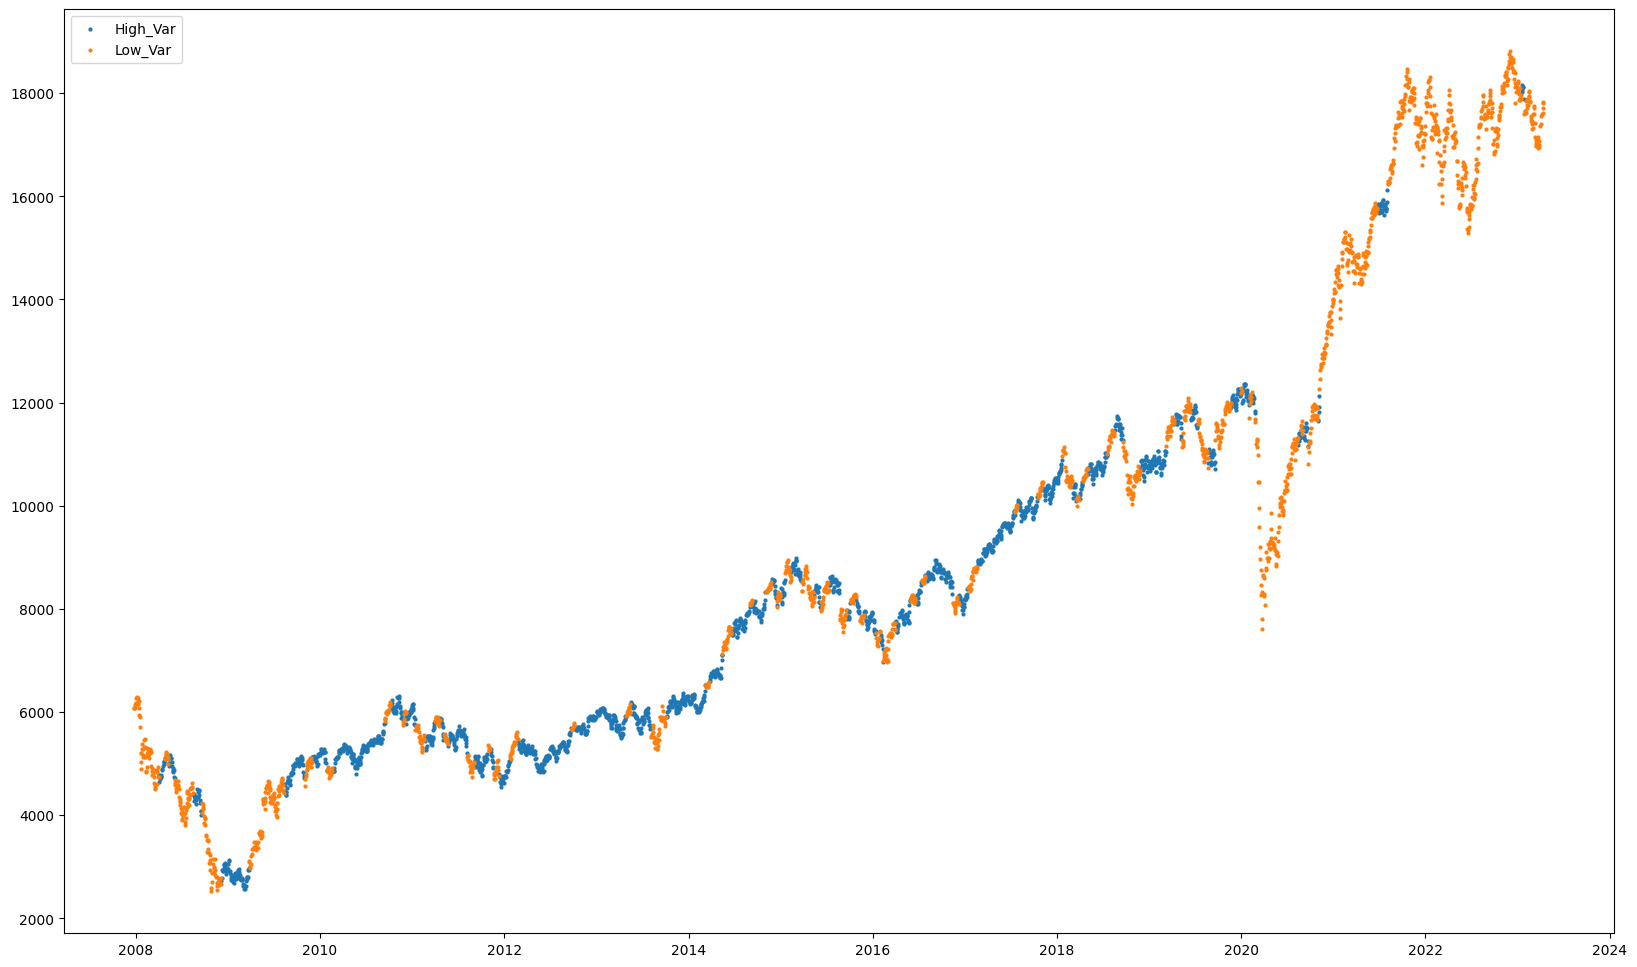

In [ ]:
plt.figure(figsize = (20,12))
plt.scatter(data[data['Regime'] == 1].index, data[data['Regime'] == 1]['Close'], s = 4, label = 'High_Var')
plt.scatter(data[data['Regime'] == 0].index, data[data['Regime'] == 0]['Close'], s = 4, label = 'Low_Var')
plt.legend()

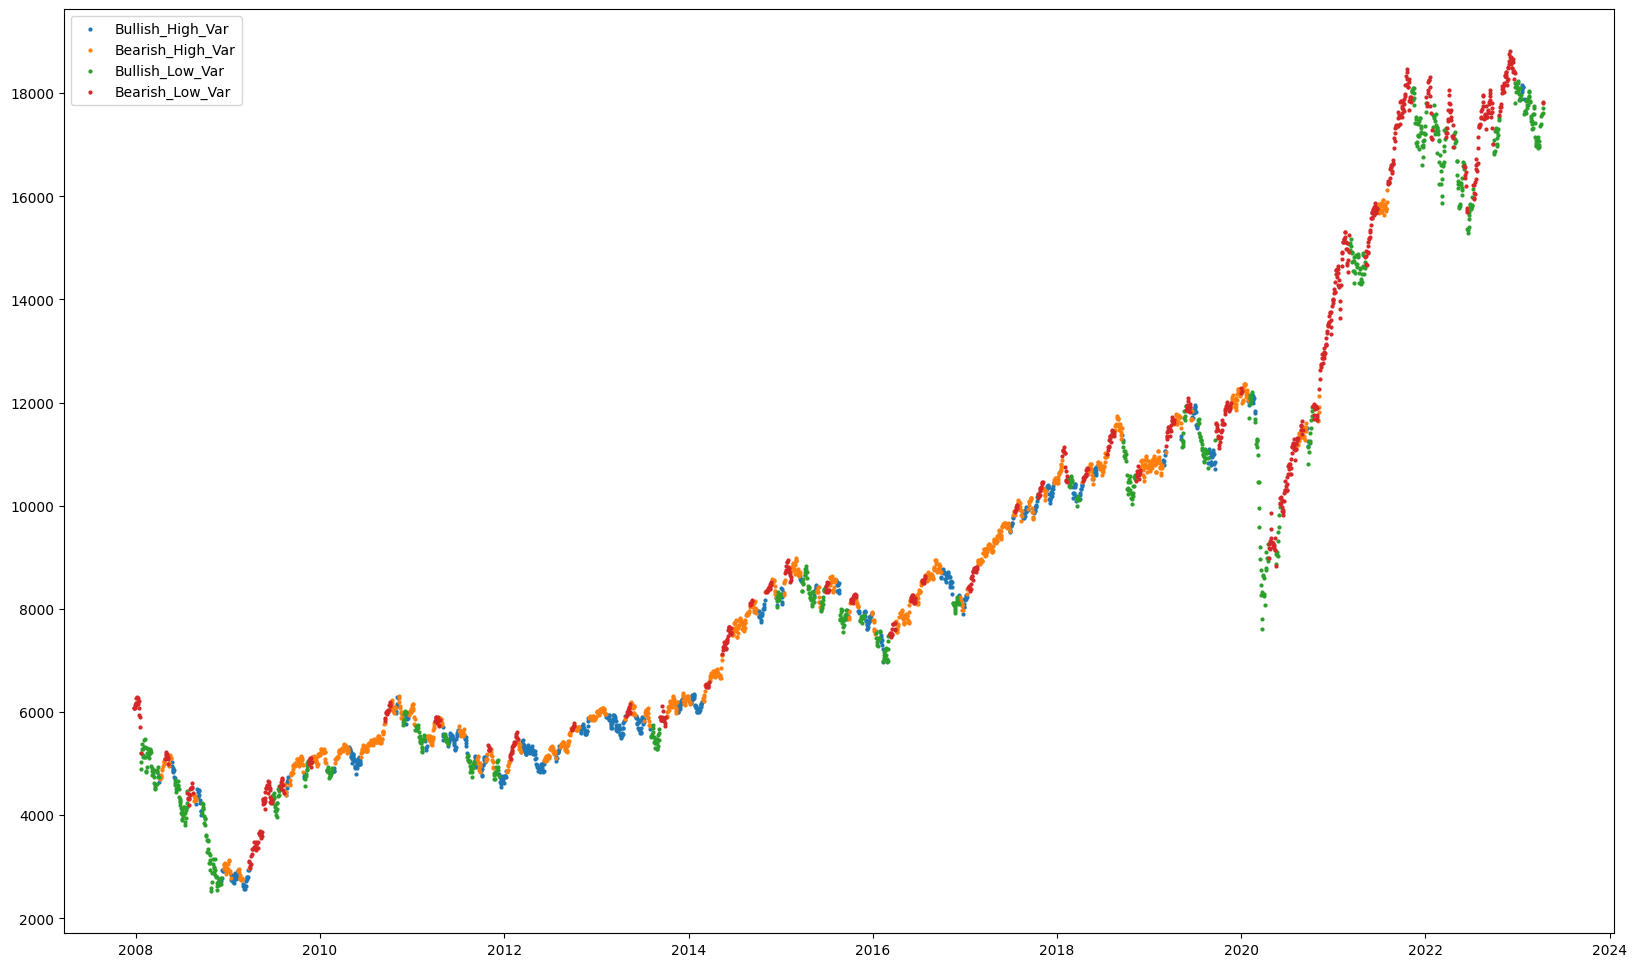

In [ ]:
plt.figure(figsize = (20,12))
plt.scatter(data[(data['Regime'] == 1) & (data['Trend'] == 0)].index, data[(data['Regime'] == 1) & (data['Trend'] == 0)]['Close'], s = 4, label = 'Bullish_High_Var')
plt.scatter(data[(data['Regime'] == 1) & (data['Trend'] == 1)].index, data[(data['Regime'] == 1) & (data['Trend'] == 1)]['Close'], s = 4, label = 'Bearish_High_Var')
plt.scatter(data[(data['Regime'] == 0) & (data['Trend'] == 0)].index, data[(data['Regime'] == 0) & (data['Trend'] == 0)]['Close'], s = 4, label = 'Bullish_Low_Var')
plt.scatter(data[(data['Regime'] == 0) & (data['Trend'] == 1)].index, data[(data['Regime'] == 0) & (data['Trend'] == 1)]['Close'], s = 4, label = 'Bearish_Low_Var')
plt.legend()

In [ ]:
from ta.volatility import BollingerBands
indicator_bb = BollingerBands(close=data["Close"], window=20, window_dev=1.5)
#data['bb_bbm_1.5'] = indicator_bb.bollinger_mavg()
#data['bb_bbh_1.5'] = indicator_bb.bollinger_hband()
#data['bb_bbl_1.5'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
data['bb_bbhi_1.5'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
data['bb_bbli_1.5'] = indicator_bb.bollinger_lband_indicator()

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5
Date,,,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,0.0,5767.558984,109.927063,1.0,0.0,0.0
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,0.0,5775.780986,97.174988,1.0,0.0,0.0
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,0.0,5784.013994,83.752075,1.0,0.0,0.0
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,0.0,5795.600000,65.114583,1.0,0.0,0.0
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,0.0,5811.467002,46.675028,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700,256.068976,0.0,17522.429023,-78.710449,0.0,1.0,0.0
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800,242.818570,0.0,17512.539023,-32.954183,0.0,1.0,0.0
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300,255.391750,0.0,17504.619023,1.595866,0.0,1.0,0.0


In [ ]:
from ta.momentum import RSIIndicator
indicator_rsi=RSIIndicator(close=data["Close"], window=14)
data['rsi']=indicator_rsi.rsi()

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5,rsi
Date,,,,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,0.0,5767.558984,109.927063,1.0,0.0,0.0,NaN
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,0.0,5775.780986,97.174988,1.0,0.0,0.0,NaN
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,0.0,5784.013994,83.752075,1.0,0.0,0.0,NaN
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,0.0,5795.600000,65.114583,1.0,0.0,0.0,NaN
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,0.0,5811.467002,46.675028,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700,256.068976,0.0,17522.429023,-78.710449,0.0,1.0,0.0,59.607921
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800,242.818570,0.0,17512.539023,-32.954183,0.0,1.0,0.0,60.323229
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300,255.391750,0.0,17504.619023,1.595866,0.0,1.0,0.0,63.099962


In [ ]:
data['SMA_10']=data['Close'].rolling(10).mean()
data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5,rsi,SMA_10
Date,,,,,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,0.0,5767.558984,109.927063,1.0,0.0,0.0,NaN,NaN
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,0.0,5775.780986,97.174988,1.0,0.0,0.0,NaN,NaN
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,0.0,5784.013994,83.752075,1.0,0.0,0.0,NaN,NaN
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,0.0,5795.600000,65.114583,1.0,0.0,0.0,NaN,NaN
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,0.0,5811.467002,46.675028,1.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700,256.068976,0.0,17522.429023,-78.710449,0.0,1.0,0.0,59.607921,17210.595117
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800,242.818570,0.0,17512.539023,-32.954183,0.0,1.0,0.0,60.323229,17257.810156
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300,255.391750,0.0,17504.619023,1.595866,0.0,1.0,0.0,63.099962,17322.350195


In [ ]:
indicator_bb = BollingerBands(close=data["Close"], window=20, window_dev=1)
#data['bb_bbm_1.5'] = indicator_bb.bollinger_mavg()
#data['bb_bbh_1.5'] = indicator_bb.bollinger_hband()
#data['bb_bbl_1.5'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
data['bb_bbhi_1'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
data['bb_bbli_1'] = indicator_bb.bollinger_lband_indicator()

data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5,rsi,SMA_10,bb_bbhi_1,bb_bbli_1
Date,,,,,,,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,0.0,5767.558984,109.927063,1.0,0.0,0.0,NaN,NaN,0.0,0.0
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,0.0,5775.780986,97.174988,1.0,0.0,0.0,NaN,NaN,0.0,0.0
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,0.0,5784.013994,83.752075,1.0,0.0,0.0,NaN,NaN,0.0,0.0
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,0.0,5795.600000,65.114583,1.0,0.0,0.0,NaN,NaN,0.0,0.0
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,0.0,5811.467002,46.675028,1.0,0.0,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700,256.068976,0.0,17522.429023,-78.710449,0.0,1.0,0.0,59.607921,17210.595117,1.0,0.0
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800,242.818570,0.0,17512.539023,-32.954183,0.0,1.0,0.0,60.323229,17257.810156,1.0,0.0
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300,255.391750,0.0,17504.619023,1.595866,0.0,1.0,0.0,63.099962,17322.350195,1.0,0.0


In [ ]:
from ta.volatility import AverageTrueRange
indicator_atr=AverageTrueRange(high=data["High"], low=data["Low"], close=data["Close"], window=14)
data["ATR"]=indicator_atr.average_true_range()

data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5,rsi,SMA_10,bb_bbhi_1,bb_bbli_1,ATR
Date,,,,,,,,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,0.0,5767.558984,109.927063,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.000000
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,0.0,5775.780986,97.174988,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.000000
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,0.0,5784.013994,83.752075,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.000000
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,0.0,5795.600000,65.114583,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.000000
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,0.0,5811.467002,46.675028,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700,256.068976,0.0,17522.429023,-78.710449,0.0,1.0,0.0,59.607921,17210.595117,1.0,0.0,191.352403
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800,242.818570,0.0,17512.539023,-32.954183,0.0,1.0,0.0,60.323229,17257.810156,1.0,0.0,184.552260
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300,255.391750,0.0,17504.619023,1.595866,0.0,1.0,0.0,63.099962,17322.350195,1.0,0.0,180.277042


In [ ]:
price_min = data.Close.min()
price_max = data.Close.max()
diff = price_max - price_min
level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
level3 = price_max - 0.618 * diff

In [ ]:
data=data.dropna()
data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5,rsi,SMA_10,bb_bbhi_1,bb_bbli_1,ATR
Date,,,,,,,,,,,,,,,,,,
2008-01-14,6208.799805,6244.149902,6172.000000,6206.799805,6206.799805,0,184.025544,0.0,5925.854004,120.852091,1.0,0.0,0.0,60.418236,6217.939990,0.0,0.0,103.999965
2008-01-15,6226.350098,6260.450195,6053.299805,6074.250000,6074.250000,0,183.868496,0.0,5930.010000,115.662496,1.0,0.0,0.0,40.301540,6210.929980,0.0,0.0,111.367853
2008-01-16,6065.000000,6065.000000,5825.750000,5935.750000,5935.750000,0,173.106238,0.0,5930.077002,105.487488,1.0,0.0,0.0,29.317338,6186.564990,0.0,0.0,121.163006
2008-01-17,5937.950195,6013.149902,5880.299805,5913.200195,5913.200195,0,158.640038,0.0,5931.395010,96.479146,1.0,0.0,0.0,27.980202,6160.030029,0.0,0.0,121.997798
2008-01-18,5907.750000,5908.750000,5677.000000,5705.299805,5705.299805,0,164.163400,0.0,5929.771006,71.670817,1.0,0.0,0.0,19.258925,6103.130029,0.0,0.0,130.155112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700,256.068976,0.0,17522.429023,-78.710449,0.0,1.0,0.0,59.607921,17210.595117,1.0,0.0,191.352403
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800,242.818570,0.0,17512.539023,-32.954183,0.0,1.0,0.0,60.323229,17257.810156,1.0,0.0,184.552260
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300,255.391750,0.0,17504.619023,1.595866,0.0,1.0,0.0,63.099962,17322.350195,1.0,0.0,180.277042


In [ ]:
#long signals
data['Buy_Signal']= np.where(data['bb_bbli_1']==1.0, 1, 0)
data['Buy_Signal']= np.where(data['rsi']<40.0, 1, data['Buy_Signal'])
#data['Buy_Signal']= np.where(data['Close']<level2, True, False)

#exit long signals
#data['Sell_Signal']= np.where(data['bb_bbhi_1.5']==1.0, True, False)
data['Sell_Signal']= np.where(data['rsi']>60.0, 1, 0)
data['Sell_Signal']= np.where(data['Close']<data['SMA_10'], 1, data['Sell_Signal'])
#data['Sell_Signal']= np.where(data['Close']<level3, True, False)
#data['Sell_Signal']= np.where(data['Close']>data['SMA_10']+3*data['ATR'], True, False)


<ipython-input-35-c9050db1b215>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy_Signal']= np.where(data['bb_bbli_1']==1.0, 1, 0)
<ipython-input-35-c9050db1b215>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy_Signal']= np.where(data['rsi']<40.0, 1, data['Buy_Signal'])
<ipython-input-35-c9050db1b215>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5,rsi,SMA_10,bb_bbhi_1,bb_bbli_1,ATR,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,,,,,,,,,
2008-01-14,6208.799805,6244.149902,6172.000000,6206.799805,6206.799805,0,184.025544,0.0,5925.854004,120.852091,1.0,0.0,0.0,60.418236,6217.939990,0.0,0.0,103.999965,0,1
2008-01-15,6226.350098,6260.450195,6053.299805,6074.250000,6074.250000,0,183.868496,0.0,5930.010000,115.662496,1.0,0.0,0.0,40.301540,6210.929980,0.0,0.0,111.367853,0,1
2008-01-16,6065.000000,6065.000000,5825.750000,5935.750000,5935.750000,0,173.106238,0.0,5930.077002,105.487488,1.0,0.0,0.0,29.317338,6186.564990,0.0,0.0,121.163006,1,1
2008-01-17,5937.950195,6013.149902,5880.299805,5913.200195,5913.200195,0,158.640038,0.0,5931.395010,96.479146,1.0,0.0,0.0,27.980202,6160.030029,0.0,0.0,121.997798,1,1
2008-01-18,5907.750000,5908.750000,5677.000000,5705.299805,5705.299805,0,164.163400,0.0,5929.771006,71.670817,1.0,0.0,0.0,19.258925,6103.130029,0.0,0.0,130.155112,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,17533.849609,17638.699219,17502.849609,17599.150391,17599.150391,242700,256.068976,0.0,17522.429023,-78.710449,0.0,1.0,0.0,59.607921,17210.595117,1.0,0.0,191.352403,0,0
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800,242.818570,0.0,17512.539023,-32.954183,0.0,1.0,0.0,60.323229,17257.810156,1.0,0.0,184.552260,0,1
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300,255.391750,0.0,17504.619023,1.595866,0.0,1.0,0.0,63.099962,17322.350195,1.0,0.0,180.277042,0,1


In [ ]:
Buying_dates=[]
Selling_dates=[]

for i in range (len(data)):
  if data['Buy_Signal'].iloc[i]==1:
    if (i+1)<len(data):
      Buying_dates.append(data.iloc[i+1].name)
    else:
       Buying_dates.append(data.iloc[i].name)
    for j in range (1, len(data)-i):
      if data['Sell_Signal'].iloc[i]==1:
        if (i+j+1)<len(data):
          Selling_dates.append(data.iloc[i+j+1].name)
        else:
          Selling_dates.append(data.iloc[i+j].name)
        break
      elif j==(len(data)-i-1):
        Selling_dates.append(data.iloc[i+j].name)

In [ ]:
len(Buying_dates)
#Buying_dates

899

In [ ]:
len(Selling_dates)
#Selling_dates

899

In [ ]:
frame=pd.DataFrame({'Buying_dates':Buying_dates, 'Selling_dates':Selling_dates})

In [ ]:
frame.head(20)

,Buying_dates,Selling_dates
0,2008-01-17,2008-01-18
1,2008-01-18,2008-01-21
2,2008-01-21,2008-01-22
3,2008-01-22,2008-01-23
4,2008-01-23,2008-01-24
5,2008-01-24,2008-01-25
6,2008-01-25,2008-01-28
7,2008-01-28,2008-01-29
8,2008-01-29,2008-01-30
9,2008-01-30,2008-01-31


In [ ]:
actualtrades= frame[frame.Buying_dates>frame.Selling_dates.shift(1)]

In [ ]:
actualtrades= frame[:1].append(actualtrades)

<ipython-input-43-7fc6bacd10da>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actualtrades= frame[:1].append(actualtrades)


In [ ]:
profits= \
data.loc[actualtrades.Selling_dates].Open.values - data.loc[actualtrades.Buying_dates].Open.values

In [ ]:
profits

array([-3.02001953e+01, -1.15502930e+01, -9.16997070e+01, -7.64501953e+01,
        1.37598508e+04,  3.41000977e+01, -6.01499023e+01, -5.96499023e+01,
        3.63999023e+01, -1.41500000e+02,  1.49140508e+04, -1.00000000e+00,
       -9.38500977e+01, -6.26999512e+01, -3.80004883e+00, -6.01999512e+01,
        6.31000977e+01,  2.40000000e+01,  3.58500977e+01,  6.82500000e+01,
        5.91000977e+01, -1.24000000e+02, -3.02998047e+01, -5.96000977e+01,
        5.68500977e+01,  2.20000000e+01,  3.89501953e+01, -7.55498047e+01,
        2.37998047e+01, -3.43500977e+01,  4.64990234e+00,  1.04500000e+02,
       -1.88002930e+01, -6.46503906e+01, -6.28496094e+01,  1.21649902e+02,
       -1.33349609e+02, -1.11299805e+02,  9.10009766e+00, -1.78999023e+01,
       -7.71997070e+01, -4.78999023e+01,  4.00000000e+00, -4.02998047e+01,
       -1.33999023e+01, -3.22001953e+01, -3.20000000e+01,  5.51000977e+01,
        3.97001953e+01,  1.58496094e+01, -5.89501953e+01,  1.00502930e+01,
        1.87001953e+01, -

In [ ]:
win_ratio = len([i for i in profits if i>0])/len(profits) #win ratio
print(win_ratio)

0.4972972972972973


In [ ]:
relprofits= \
(data.loc[actualtrades.Selling_dates].Open.values - data.loc[actualtrades.Buying_dates].Open.values)/data.loc[actualtrades.Buying_dates].Open.values

In [ ]:
relprofits

array([-5.08596305e-03, -2.25059776e-03, -1.84932512e-02, -1.54332594e-02,
        3.39963458e+00,  7.96015194e-03, -1.40185055e-02, -1.38992220e-02,
        8.82261464e-03, -3.54618820e-02,  5.15477431e+00, -3.76293509e-04,
       -3.27134895e-02, -2.25750534e-02, -1.38827247e-03, -2.25286580e-02,
        1.48432397e-02,  5.68276019e-03,  8.60540030e-03,  1.55484679e-02,
        1.34491100e-02, -2.49469384e-02, -6.07984214e-03, -1.16997141e-02,
        1.18393311e-02,  4.22402719e-03,  7.46851931e-03, -1.44623377e-02,
        4.63594929e-03, -6.74337901e-03,  8.59676168e-04,  1.73908705e-02,
       -3.11265695e-03, -1.06403753e-02, -1.05686439e-02,  2.11161087e-02,
       -2.25966505e-02, -1.94399959e-02,  1.71020719e-03, -3.30943422e-03,
       -1.33866910e-02, -8.71525291e-03,  7.42790278e-04, -7.44569140e-03,
       -2.43971717e-03, -6.67569095e-03, -6.32523559e-03,  1.16402097e-02,
        8.42390871e-03,  3.40124008e-03, -1.11944921e-02,  1.91173795e-03,
        3.55811282e-03, -

In [ ]:
relprofits.mean()*100 #avg profit per trade

4.449507130158774

In [ ]:
arr= 100000 * (relprofits +1 ).cumprod()
final_val= arr[len(arr)-1]
print(final_val)
#final amont if started with Rs. 1 lakh

1927586.740165523


In [ ]:
#CAGR
cagr= (((final_val/100000.0)**(365.0/5688))-1)*100
cagr

20.909264366063283

In [ ]:
#maximum drawdown
max_draw=min(relprofits)
(max_draw*-1)*100

3.908549965660033